In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# EDA

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.shape

(21613, 21)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.bathrooms = np.round(df.bathrooms)

In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Check for null values

In [8]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check for unique values

In [9]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
num_unique,21436,372,4028,13,9,1038,9782,6,2,5,5,12,946,306,116,70,70,5034,752,777,8689
dtypes,int64,object,float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64


**Remove columns**

In [10]:
df.drop(["id","date","zipcode","lat","long"],axis=1,inplace=True)

**Change location of price to the last columns**

In [11]:
columns=df.columns.tolist()
columns.append(columns.pop(columns.index("price")))
df=df[columns]

In [12]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0


**Reprsent some columns as categorical**

In [13]:
cols="bedrooms bathrooms floors waterfront view condition grade".split()
df[cols]=df[cols].astype("category")
# df.info()

**Check for duplicited**

In [14]:
df.duplicated().sum()

6

**drop duplicated**

In [15]:
df.drop_duplicates(inplace=True)
# check for duplicated
df.duplicated().sum()

0

# Statistics about Data

In [16]:
df.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,2.160700e+04
mean,2079.954783,1.511019e+04,1788.397186,291.557597,1970.997917,84.334058,1986.591799,12770.571991,5.401067e+05
std,918.526856,4.142579e+04,828.156250,442.618358,29.370686,401.525908,685.436161,27307.553760,3.671710e+05
min,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,7.500000e+04
25%,1428.500000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.217250e+05
50%,1910.000000,7.620000e+03,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,2550.000000,1.069200e+04,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.500000,6.450000e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


In [17]:
df.describe(include="category")

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,21607,21607.0,21607.0,21607,21607,21607,21607
unique,13,9.0,6.0,2,5,5,12
top,3,2.0,1.0,0,0,3,7
freq,9821,13845.0,10680.0,21444,19484,14026,8981


### Feature Enginer

20694
913


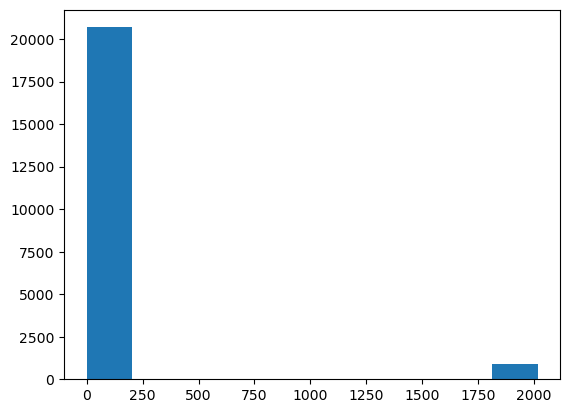

In [18]:
print(sum(df.yr_renovated == 0))
print(sum(df.yr_renovated != 0))
plt.hist(df.yr_renovated)
plt.show()
# columns do not have variation 

In [19]:
df['year_b']=df.apply(lambda x: max(x["yr_built"], x["yr_renovated"]),axis=1)


In [20]:
df.drop(['yr_built','yr_renovated'],axis=1,inplace=True)

### Cheange location of column price

In [21]:
columns=df.columns.tolist()
columns.append(columns.pop(columns.index("price")))
df=df[columns]

**Visualization**

In [22]:
numeric_df=df.select_dtypes("number")
# numeric_df

In [23]:
categorical_df=df.select_dtypes("category")
# categorical_df

<function matplotlib.pyplot.show(close=None, block=None)>

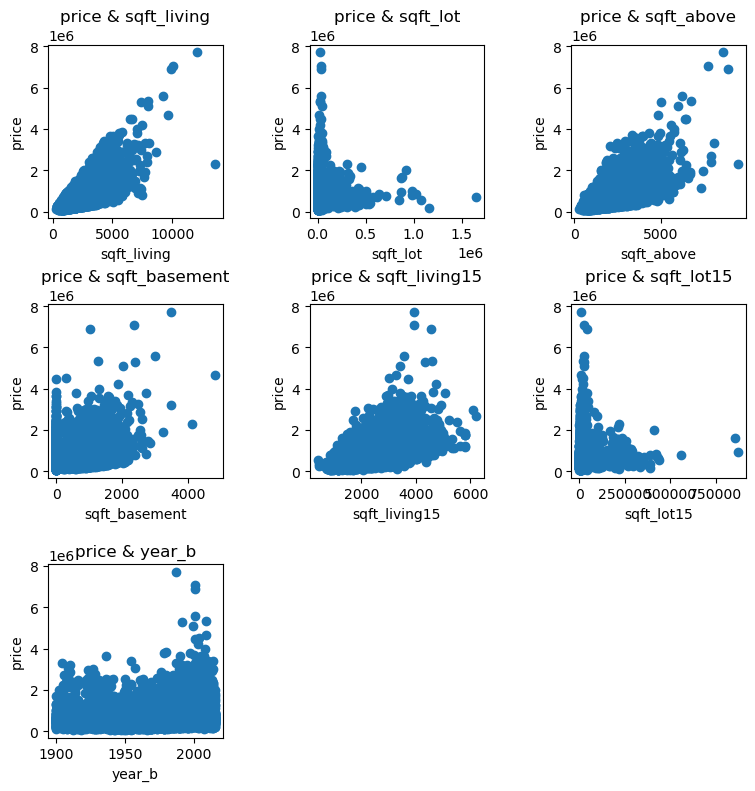

In [24]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [25]:
corr=numeric_df.corr()
corr

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year_b,price
sqft_living,1.000000,0.172811,0.876595,0.435068,0.756401,0.183260,0.343920,0.702041
sqft_lot,0.172811,1.000000,0.183515,0.015254,0.144593,0.718551,0.053011,0.089646
sqft_above,0.876595,0.183515,1.000000,-0.051919,0.731856,0.194044,0.436041,0.605576
sqft_basement,0.435068,0.015254,-0.051919,1.000000,0.200361,0.017239,-0.102142,0.323829
sqft_living15,0.756401,0.144593,0.731856,0.200361,1.000000,0.183161,0.324781,0.585376
sqft_lot15,0.183260,0.718551,0.194044,0.017239,0.183161,1.000000,0.070335,0.082427
year_b,0.343920,0.053011,0.436041,-0.102142,0.324781,0.070335,1.000000,0.105844
price,0.702041,0.089646,0.605576,0.323829,0.585376,0.082427,0.105844,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

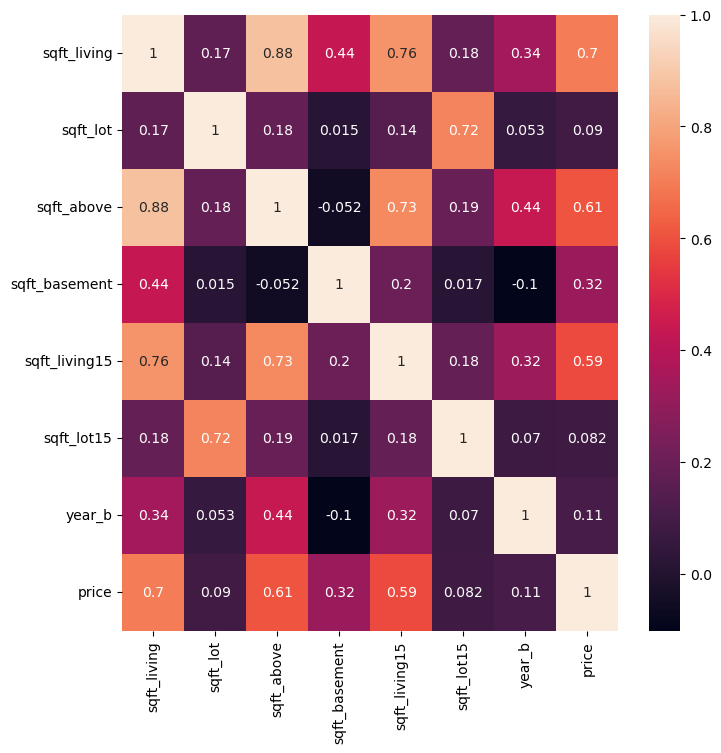

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show

**Check for outliers**

<function matplotlib.pyplot.show(close=None, block=None)>

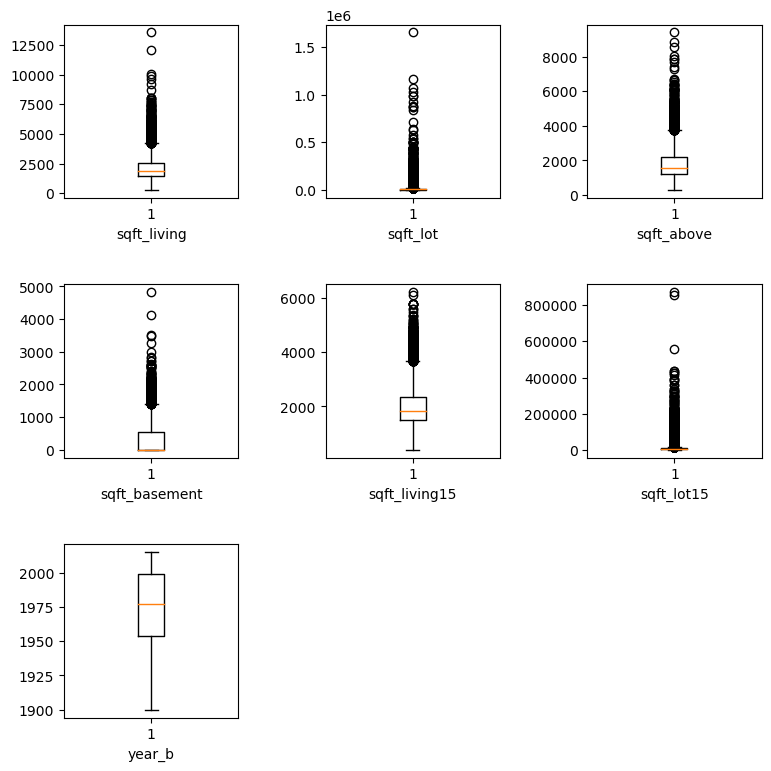

In [27]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

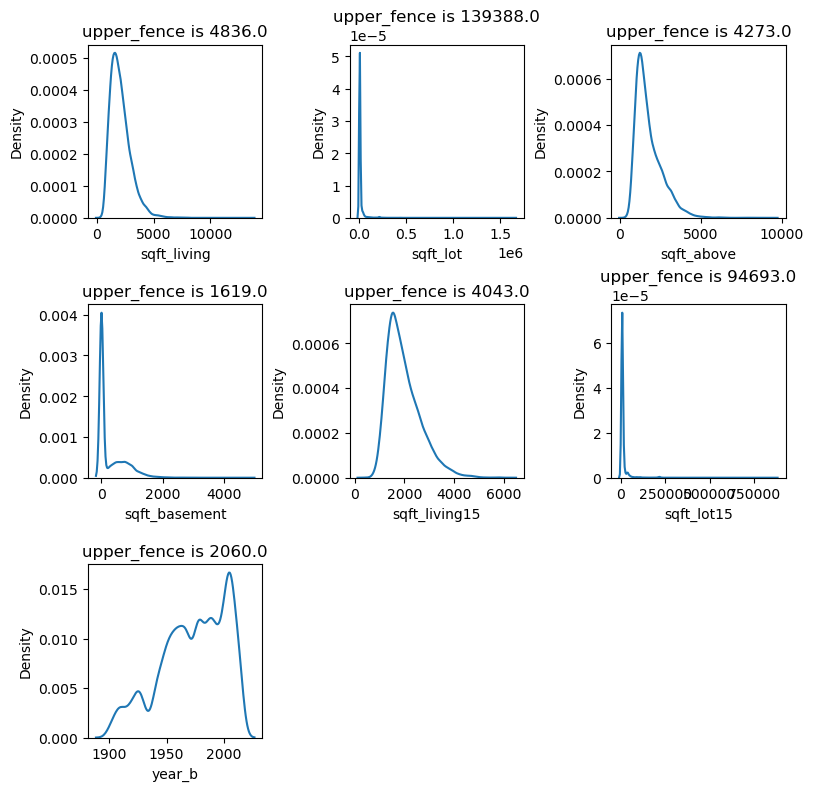

In [28]:
plt.figure(figsize=(9,9))
for i,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

# Replace outliers

In [29]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence = Q3+1.5*IQR
    #lower_fence=Q1-1.5*IQR
    
    upper_out = df[df[col] > upper_fence][col].values
    df[col].replace(upper_out, upper_fence, inplace=True)
    
    print(f"Upper fence of {col} is: {upper_fence}")
    print(df[col].max())
    print("------------")

Upper fence of sqft_living is: 4232.25
4232.25
------------
Upper fence of sqft_lot is: 19170.0
19170
------------
Upper fence of sqft_above is: 3740.0
3740
------------
Upper fence of sqft_basement is: 1400.0
1400
------------
Upper fence of sqft_living15 is: 3665.0
3665
------------
Upper fence of sqft_lot15 is: 17558.75
17558.75
------------
Upper fence of year_b is: 2066.5
2015.0
------------


<function matplotlib.pyplot.show(close=None, block=None)>

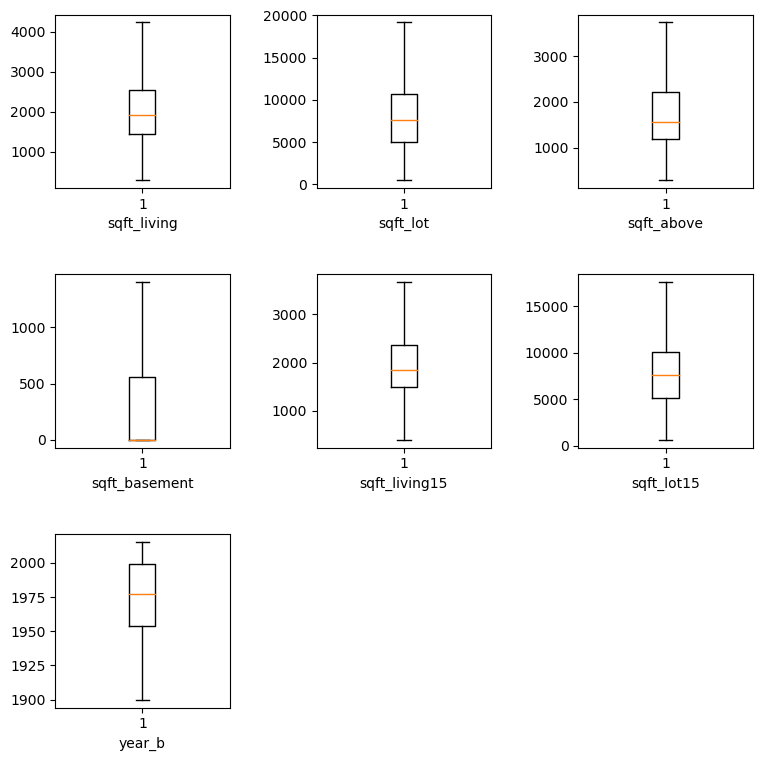

In [30]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

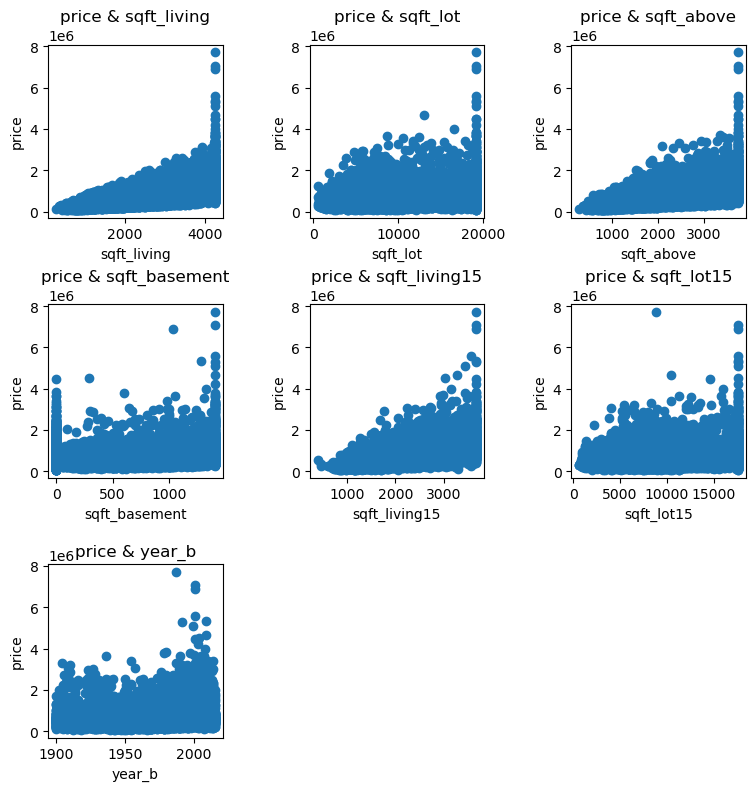

In [31]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

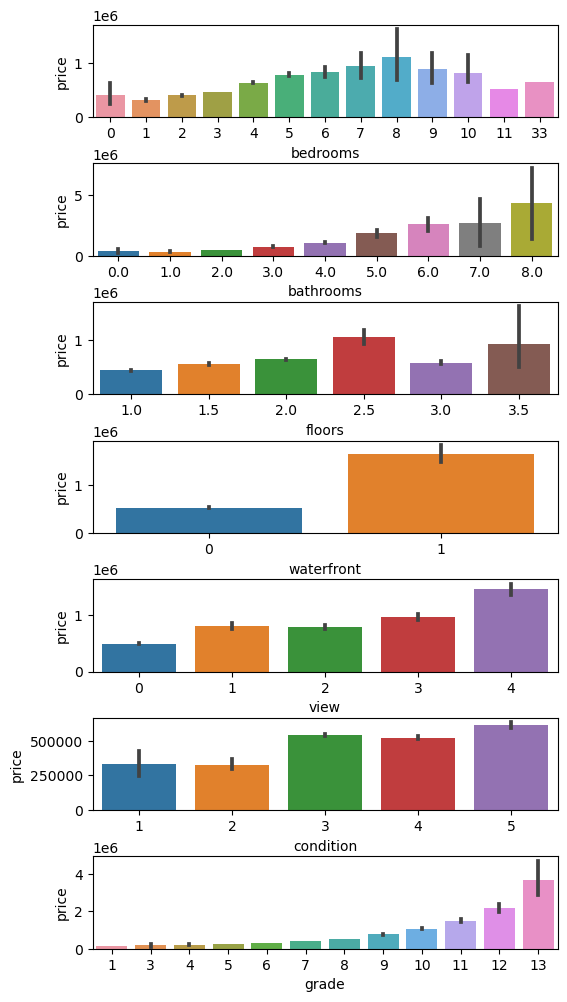

In [32]:
plt.figure(figsize=(6,12))
for i,col in enumerate (categorical_df.columns):
    plt.subplot(7,1,i+1)
    sns.barplot(x=df[col],y=df["price"])
    plt.xlabel(col)
plt.subplots_adjust(hspace=.5)
plt.show()    

# Split data

In [33]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=14)

# Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns

In [36]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])
y_train[["price"]]=y_scaler.fit_transform(y_train[["price"]])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])
y_test[["price"]]=y_scaler.transform(y_test[["price"]])

# ML

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

predict_tr=model.predict(x_train)
predict_ts=model.predict(x_test)

## Predict

In [38]:
y_train=y_scaler.inverse_transform(y_train)
y_test=y_scaler.inverse_transform(y_test)

y_pred_train=y_scaler.inverse_transform(predict_tr)
y_pred_test=y_scaler.inverse_transform(predict_ts)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
training_err = np.round(mean_absolute_error(y_train, predict_tr))
test_err = np.round(mean_absolute_error(y_test, predict_ts))
print(test_err)
print(training_err)

545726.0
537338.0


In [40]:
# train_acc = (abs(predict_tr - y_train) > 100).sum() / y_train.shape[0] * 100 
# test_acc = (abs(predict_ts - y_test) > 100).sum() / y_test.shape[0] * 100 
# print(train_acc)
# print(test_acc)

## lasso

In [41]:
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.1)
# clf.fit(x_train,y_train)

# predict_tr=model.predict(x_train)
# predict_ts=model.predict(x_test)

In [42]:
# y_train=y_scaler.inverse_transform(y_train)
# y_test=y_scaler.inverse_transform(y_test)

# y_pred_train=y_scaler.inverse_transform(predict_tr)
# y_pred_test=y_scaler.inverse_transform(predict_ts)

In [43]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error
# training_err = np.round(mean_absolute_error(y_train, predict_tr))
# test_err = np.round(mean_absolute_error(y_test, predict_ts))
# print(test_err)
# print(training_err)